In [1]:
#Git Hub link:
#https://github.com/christacaggiano/machine_learning_exercises/blob/main/chest_pain_prediction.ipynb
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2, VarianceThreshold
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers


In [2]:
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers


In [3]:
cleanedDf = pd.read_csv("cleaned_SwedishData.csv", delimiter=",")
expressionData = pd.read_csv("cleaned_ExpressionData.csv", delimiter=",")

In [4]:
cleanedDf

,!Sample_geo_accession,Gender,Age,Allergy,Asthma,Dermatitis,rhinitis
0,GSM4209620,1,195.5592,1,0,1,0
1,GSM4209621,1,204.0461,0,0,0,0
2,GSM4209622,0,201.6776,1,1,1,0
3,GSM4209623,1,205.6250,1,1,0,0
4,GSM4209624,0,202.8947,0,0,0,0
...,...,...,...,...,...,...,...
251,GSM4209871,1,201.7105,0,0,0,0
252,GSM4209872,1,201.5461,1,1,0,1
253,GSM4209873,0,202.7631,0,0,0,0
254,GSM4209874,1,203.2237,0,0,0,0


In [5]:
expressionData.head()

,TC01000001.hg.1,TC01000002.hg.1,TC01000003.hg.1,TC01000004.hg.1,TC01000005.hg.1,TC01000006.hg.1,TC01000007.hg.1,TC01000008.hg.1,TC01000009.hg.1,TC01000010.hg.1,...,TCUn_gl000228000012.hg.1,TCUn_gl000228000013.hg.1,TCUn_gl000228000014.hg.1,TCUn_gl000237000001.hg.1,TCUn_gl000237000002.hg.1,TCUn_gl000241000001.hg.1,TCUn_gl000241000002.hg.1,TCUn_gl000243000001.hg.1,TCUn_gl000243000002.hg.1,TCUn_gl000247000001.hg.1
0,7.429823,4.388578,2.371792,5.275303,9.702489,11.799802,12.070954,6.996882,1.614111,3.492010,...,2.657722,6.307265,4.691915,6.020328,5.831065,5.642116,5.795866,6.400864,6.347468,6.400864
1,6.185963,4.001252,1.935577,6.272907,10.218112,11.969852,12.667002,8.177514,1.529896,3.043273,...,3.153498,6.036182,4.904974,5.684232,5.599217,5.592368,5.775740,5.094467,6.672159,5.094467
2,7.825112,4.261002,2.641741,5.066341,9.856455,11.973046,12.180124,7.075101,2.286690,3.299668,...,2.677549,6.229489,4.804676,5.898304,5.818457,5.232601,5.374681,3.737465,6.181059,3.737465
3,5.970286,4.018165,1.942758,5.142228,10.081747,12.224622,12.343981,8.123771,1.429856,3.175787,...,2.634139,6.276416,5.101769,5.800389,5.764109,5.830511,5.962839,5.765790,6.613098,5.765790
4,5.057495,4.067344,1.857217,5.073486,9.537027,11.809516,12.237580,7.427976,1.512572,3.546307,...,2.637874,6.438287,5.226228,5.960240,5.819446,5.534489,5.722457,5.056717,6.293271,5.056717


In [6]:
y = cleanedDf["Allergy"].values
x = expressionData.values


In [7]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
x.shape

(256, 67528)

In [8]:
#K best
selector = SelectKBest(f_classif, k=125)
x_new = selector.fit_transform(x, y)

x_new.shape

(256, 125)

In [9]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3, random_state=0)

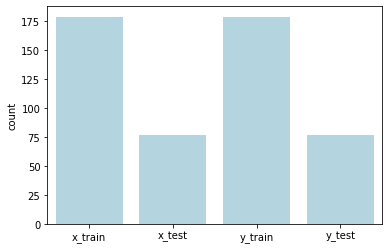

In [10]:
#plot training and testing data
sns.barplot(x=["x_train", "x_test", "y_train", "y_test"], 
            y=[len(x_train), len(x_test), len(y_train), len(y_test)],
           color="lightblue")
plt.ylabel("count")
plt.show()

In [9]:
param_grid = {'C': [0.1, 1, 10, 100],'kernel': ['linear', 'poly', 'rbf'],'gamma': [0.1, 1, 10, 100]}


model = SVC()

# create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(x_train, y_train)

# print the best parameters
print(grid_search.best_params_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [11]:


clf = svm.SVC()#C=0.1, gamma = 0.1, kernel = 'rbf')

In [12]:
type(y_train[0])

numpy.int64

In [13]:
clf.fit(x_train,y_train)



SVC()

In [14]:
x_train.shape

(179, 67528)

In [15]:
y_train.shape

(179,)

In [16]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

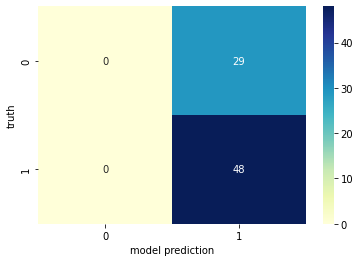

In [17]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

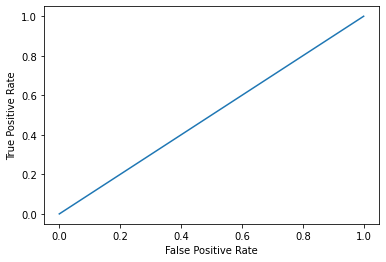

In [18]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.77        77

    accuracy                           0.62        77
   macro avg       0.50      0.31      0.38        77
weighted avg       1.00      0.62      0.77        77



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier